In [4]:
# Install ultralytics library
!pip install ultralytics

# Import necessary libraries
import cv2
from ultralytics import YOLO # Now you should be able to import YOLO
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

Saving cat2.jpg to cat2.jpg

image 1/1 /content/cat2.jpg: 608x640 2 cats, 1 dog, 220.7ms
Speed: 4.8ms preprocess, 220.7ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 640)


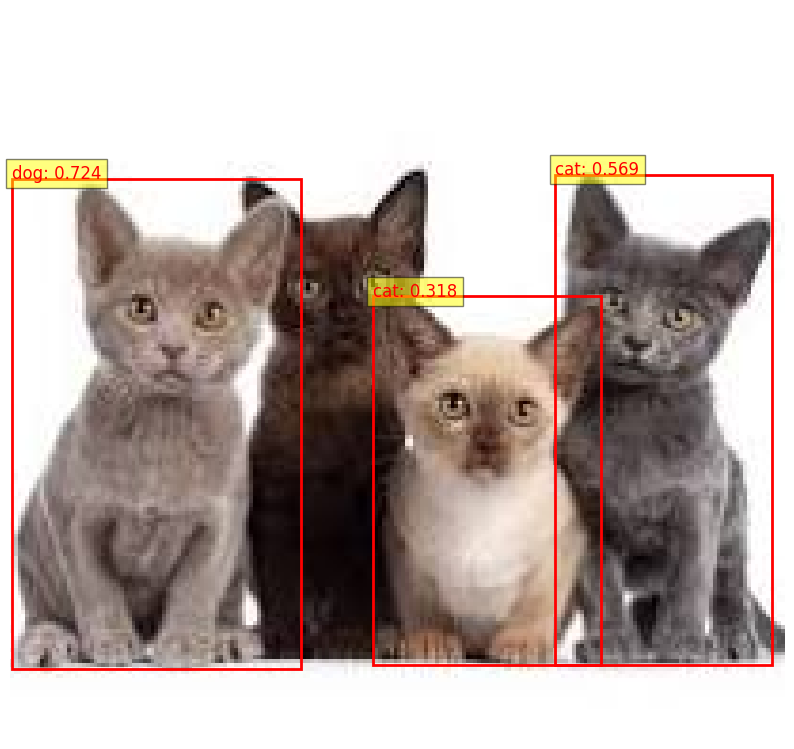

In [6]:
# Initialize YOLO model
model = YOLO('yolov8n.pt')

def detect_objects(image):
    results = model(image)[0]

    detections = []
    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, score, class_id = result
        detections.append([int(x1), int(y1), int(x2), int(y2), round(score, 3), results.names[int(class_id)]])

    return detections

def plot_image_with_detections(image_path, detections):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for Matplotlib

    plt.figure(figsize=(10, 10))
    plt.imshow(img)

    # Draw bounding boxes and labels
    for detection in detections:
        x1, y1, x2, y2, confidence, class_name = detection
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, edgecolor='red', facecolor='none'))
        plt.text(x1, y1, f'{class_name}: {confidence}', color='red', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

    plt.axis('off')
    plt.show()

# Upload an image file
uploaded = files.upload()

# Assuming only one file is uploaded
for filename in uploaded.keys():
    # Perform object detection
    detections = detect_objects(filename)

    # Plot the image with detection results
    plot_image_with_detections(filename, detections)